In [1]:
import numpy as np #lib para cálculos e funções em arrays multidimensionais
import pandas as pd #pandas - lib para manipulação e análise de dados de alta performance
import seaborn as sb #lib pra dar um upgrade na visualização do matplotlib
import matplotlib #lib para plotar gráficos
import matplotlib.pyplot as plt
sb.set_style('darkgrid') #definindo tema do seaborn (fundo mais escuro com grelhas)

font = {'family' : 'Arial', #definindo objeto para formatar a fonte
        'size'   : 16}

matplotlib.rc('font', **font) #aplicando a fonte padrão que queremos para o plot dos gráficos

## 1 - Carregando os Datasets pré-tratados ##

In [2]:
#Carregando o dataset de óbitos por raça por semana
cor_se_norm = pd.read_csv('cor-semana-covid-tratado.csv', sep=',')

#Removendo a coluna de índice
cor_se_norm = cor_se_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - Óbitos por covid / Raça / Semana Epidemiológica')
display(cor_se_norm)


Tabela Pré-Tratada - Óbitos por covid / Raça / Semana Epidemiológica


,SE_20 11,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,...,SE_20 45,SE_20 46,SE_20 47,SE_20 48,SE_20 49,SE_20 50,SE_20 51,SE_20 52,SE_20 53,Cor
0,3.0,51.0,229.0,591.0,1028.0,1470.0,1971.0,2605.0,3220.0,3905.0,...,12543.0,12680.0,12839.0,13031.0,13259.0,13521.0,13822.0,14106.0,14297.0,Branca
1,0.0,2.0,17.0,71.0,135.0,190.0,268.0,370.0,456.0,576.0,...,1869.0,1885.0,1901.0,1931.0,1958.0,1998.0,2037.0,2081.0,2108.0,Preta
2,0.0,2.0,12.0,28.0,45.0,64.0,92.0,116.0,146.0,164.0,...,459.0,465.0,475.0,484.0,492.0,503.0,514.0,529.0,544.0,Amarela
3,0.0,5.0,42.0,168.0,339.0,526.0,733.0,1016.0,1317.0,1615.0,...,4856.0,4898.0,4946.0,4997.0,5073.0,5139.0,5223.0,5303.0,5367.0,Parda
4,0.0,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,7.0,...,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,Indígena
5,0.0,0.0,12.0,29.0,54.0,82.0,104.0,145.0,186.0,226.0,...,686.0,689.0,690.0,697.0,705.0,720.0,736.0,747.0,756.0,Não informado
6,3.0,60.0,313.0,888.0,1604.0,2335.0,3172.0,4256.0,5331.0,6493.0,...,20428.0,20632.0,20866.0,21155.0,21502.0,21897.0,22348.0,22782.0,23088.0,Total


In [4]:
#Carregando o dataset de população por idade por raça
pop_norm = pd.read_csv('cor-idade-2010-tratado.csv', sep=',')

#Removendo a coluna de índice
pop_norm = pop_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - População / Cor / Idade')
display(pop_norm)


Tabela Pré-Tratada - População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977
5,Ignorado,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313
6,Total,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503


## 2 - Tratamento dos dados - Segundo Ciclo ##

In [5]:
#removendo a primeira e última coluna (cor e total) 
cor_se_soma = cor_se_norm.loc[:, cor_se_norm.columns[1:-1]]

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_soma)




Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,SE_20 21,...,SE_20 44,SE_20 45,SE_20 46,SE_20 47,SE_20 48,SE_20 49,SE_20 50,SE_20 51,SE_20 52,SE_20 53
0,51.0,229.0,591.0,1028.0,1470.0,1971.0,2605.0,3220.0,3905.0,4573.0,...,12438.0,12543.0,12680.0,12839.0,13031.0,13259.0,13521.0,13822.0,14106.0,14297.0
1,2.0,17.0,71.0,135.0,190.0,268.0,370.0,456.0,576.0,661.0,...,1855.0,1869.0,1885.0,1901.0,1931.0,1958.0,1998.0,2037.0,2081.0,2108.0
2,2.0,12.0,28.0,45.0,64.0,92.0,116.0,146.0,164.0,183.0,...,457.0,459.0,465.0,475.0,484.0,492.0,503.0,514.0,529.0,544.0
3,5.0,42.0,168.0,339.0,526.0,733.0,1016.0,1317.0,1615.0,1940.0,...,4820.0,4856.0,4898.0,4946.0,4997.0,5073.0,5139.0,5223.0,5303.0,5367.0
4,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,7.0,8.0,...,14.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0
5,0.0,12.0,29.0,54.0,82.0,104.0,145.0,186.0,226.0,260.0,...,683.0,686.0,689.0,690.0,697.0,705.0,720.0,736.0,747.0,756.0
6,60.0,313.0,888.0,1604.0,2335.0,3172.0,4256.0,5331.0,6493.0,7625.0,...,20267.0,20428.0,20632.0,20866.0,21155.0,21502.0,21897.0,22348.0,22782.0,23088.0


## 3 - Feature Engineering + Mesclando os dados entre os datasets ##

In [6]:
#adicionando novamente a coluna com o label das cores
cor_se_soma['Cor'] = cor_se_norm['Cor']

#adicionando a coluna Habitantes que vem do outro dataset (populacao - coluna Total)
cor_se_soma['Habitantes'] = pop_norm.loc[:,'Total']

#eliminando as linhas 5 e 6 - Não informado / Total
cor_se_soma = cor_se_soma.drop([5, 6]) 

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_soma)


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,SE_20 21,...,SE_20 46,SE_20 47,SE_20 48,SE_20 49,SE_20 50,SE_20 51,SE_20 52,SE_20 53,Cor,Habitantes
0,51.0,229.0,591.0,1028.0,1470.0,1971.0,2605.0,3220.0,3905.0,4573.0,...,12680.0,12839.0,13031.0,13259.0,13521.0,13822.0,14106.0,14297.0,Branca,6824668
1,2.0,17.0,71.0,135.0,190.0,268.0,370.0,456.0,576.0,661.0,...,1885.0,1901.0,1931.0,1958.0,1998.0,2037.0,2081.0,2108.0,Preta,736083
2,2.0,12.0,28.0,45.0,64.0,92.0,116.0,146.0,164.0,183.0,...,465.0,475.0,484.0,492.0,503.0,514.0,529.0,544.0,Amarela,246244
3,5.0,42.0,168.0,339.0,526.0,733.0,1016.0,1317.0,1615.0,1940.0,...,4898.0,4946.0,4997.0,5073.0,5139.0,5223.0,5303.0,5367.0,Parda,3433218
4,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,7.0,8.0,...,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,Indígena,12977


In [7]:
#Transformando as colunas 'SEMANAS' E 'ÓBITOS' em linhas
cor_se_melt = cor_se_soma.melt(id_vars=['Cor', 'Habitantes'], value_vars = cor_se_norm.columns[1:-1],var_name='Semana', value_name='Óbitos')

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_melt.tail())


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,Cor,Habitantes,Semana,Óbitos
205,Branca,6824668,SE_20 53,14297.0
206,Preta,736083,SE_20 53,2108.0
207,Amarela,246244,SE_20 53,544.0
208,Parda,3433218,SE_20 53,5367.0
209,Indígena,12977,SE_20 53,16.0


In [8]:
#adicionando nova coluna (óbitos por 100.000 hab)
cor_se_melt['Óbitos por 100 mil'] = (100000 * cor_se_melt['Óbitos']) / cor_se_melt['Habitantes']

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_melt.tail())


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,Cor,Habitantes,Semana,Óbitos,Óbitos por 100 mil
205,Branca,6824668,SE_20 53,14297.0,209.490044
206,Preta,736083,SE_20 53,2108.0,286.380748
207,Amarela,246244,SE_20 53,544.0,220.919088
208,Parda,3433218,SE_20 53,5367.0,156.325640
209,Indígena,12977,SE_20 53,16.0,123.295060


## 4 - Plotando o primeiro gráfico para análise de tendência ##

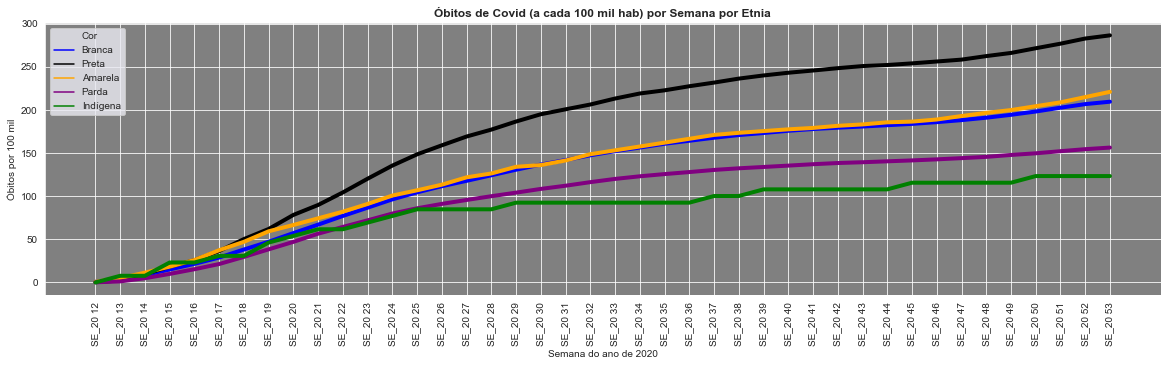

In [11]:
fig, axs = plt.subplots(figsize=(20, 5))
colors = ['blue', 'black', 'orange', 'purple', 'green']
sb.lineplot(data=cor_se_melt, x='Semana', y='Óbitos por 100 mil', hue='Cor', palette=colors, lw=4)
plt.xticks(rotation=90)
plt.legend()
axs.set_facecolor("gray")
axs.set_alpha(0.9)
plt.xlabel('Semana do ano de 2020')
plt.title('Óbitos de Covid (a cada 100 mil hab) por Semana por Etnia',fontweight="bold")
plt.show()

## 5 - Exportando os Resultados Preliminares ##

In [10]:
cor_se_melt.to_csv('mortalidade-cor-semana-tratado.csv')